In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

PATH_FIGURES = "/Users/giovanni.palla/Projects/squidpy_reproducibility/notebooks/graph_figures/figures"

scanpy==1.8.0.dev78+gc488909a anndata==0.7.5 umap==0.4.6 numpy==1.20.1 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
adata = sq.datasets.slideseqv2()
adata

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [18]:
fig, ax = plt.subplots(
    figsize=(3, 6),
)
sc.pl.spatial(
    adata,
    color=["cluster"],
    save="_slideseqv2.png",
    spot_size=30,
    frameon=False,
    ax=ax,
    show=False,
)

[<AxesSubplot:title={'center':'cluster'}, xlabel='spatial1', ylabel='spatial2'>]

In [52]:
mode = "L"
sq.gr.ripley(adata, cluster_key="cluster", mode=mode, max_dist=1000)

Calculating Ripley's L statistic for `14` clusters and `100` simulations
Adding `adata.uns['cluster_ripley_L']`
Finish (0:00:15)


No handles with labels found to put in legend.


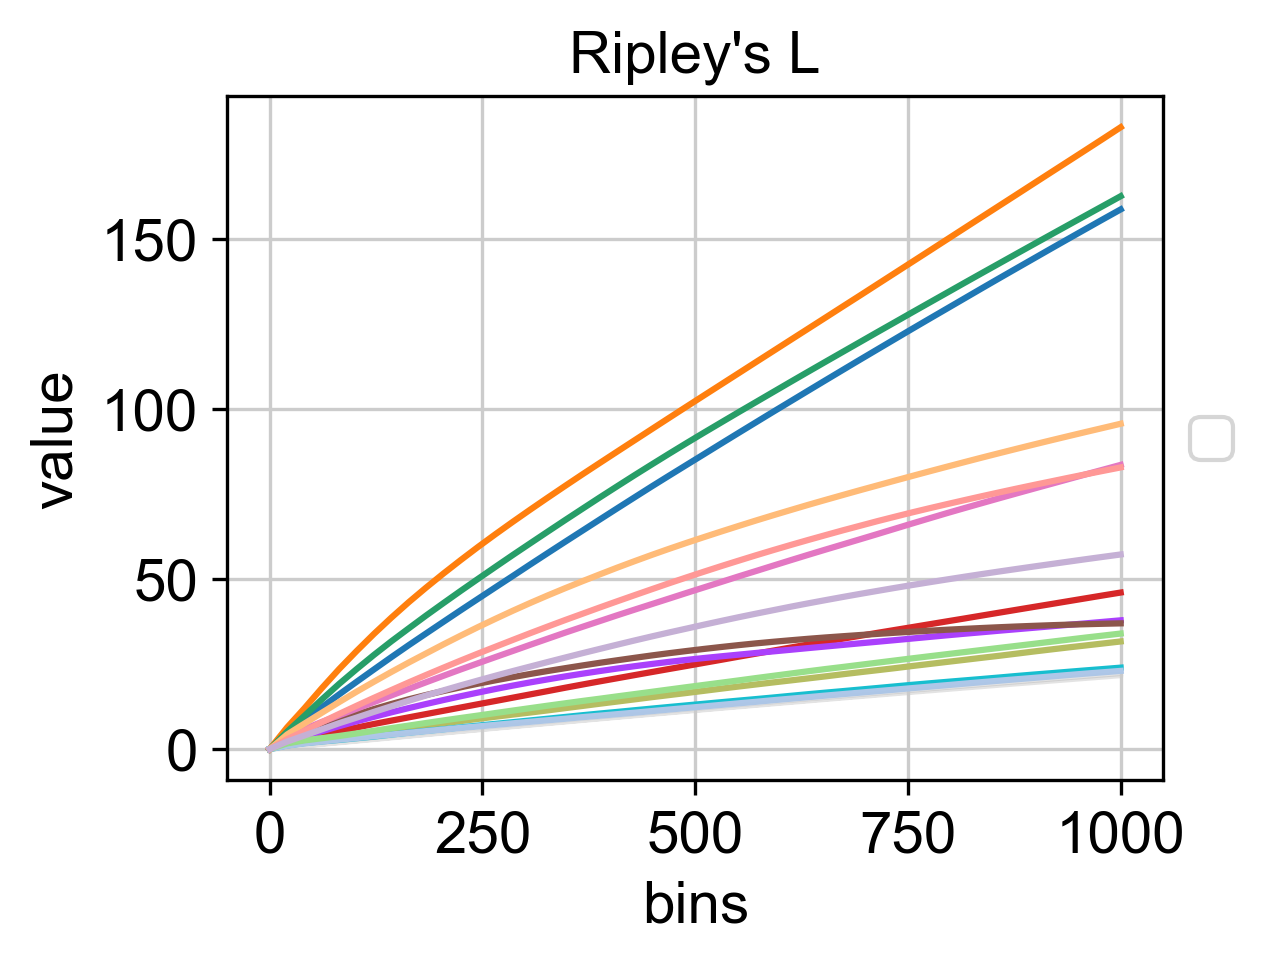

In [53]:
sq.pl.ripley(
    adata,
    cluster_key="cluster",
    mode=mode,
    dpi=300,
    save="ripley_slideseq",
    figsize=(4, 3),
    legend=False,
)

In [19]:
adata.obs.cluster.cat.categories

Index(['Astrocytes', 'CA1_CA2_CA3_Subiculum', 'DentatePyramids',
       'Endothelial_Stalk', 'Endothelial_Tip', 'Ependymal', 'Interneurons',
       'Microglia', 'Mural', 'Neurogenesis', 'Oligodendrocytes',
       'Polydendrocytes', 'Subiculum_Entorhinal_cl2',
       'Subiculum_Entorhinal_cl3'],
      dtype='object')

In [25]:
fig, ax = plt.subplots(
    figsize=(3, 6),
)
sc.pl.spatial(
    adata,
    color=["cluster"],
    groups=["Oligodendrocytes", "DentatePyramids", "Endothelial_Stalk"],
    save="_slideseqv2_groups.png",
    spot_size=30,
    frameon=False,
    ax=ax,
    show=False,
)

[<AxesSubplot:title={'center':'cluster'}, xlabel='spatial1', ylabel='spatial2'>]

In [11]:
fig, ax = plt.subplots(
    figsize=(3, 6),
)
sc.pl.spatial(
    adata,
    color=["celltype_mapped_refined"],
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
        "Dermomyotome",
    ],
    save="_endo_seqfish.png",
    frameon=False,
    ax=ax,
    show=False,
    spot_size=0.03,
)

[<AxesSubplot:title={'center':'celltype_mapped_refined'}, xlabel='spatial1', ylabel='spatial2'>]

In [15]:
sq.gr.co_occurrence(adata, cluster_key="cluster", n_splits=1)

Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


  0%|          | 0/1 [00:00<?, ?/s]

Adding `adata.uns['cluster_co_occurrence']`
Finish (0:03:58)


In [33]:
adata.obs["cluster"].replace("Endothelial tip", "Endothelial_Tip", inplace=True)

No handles with labels found to put in legend.


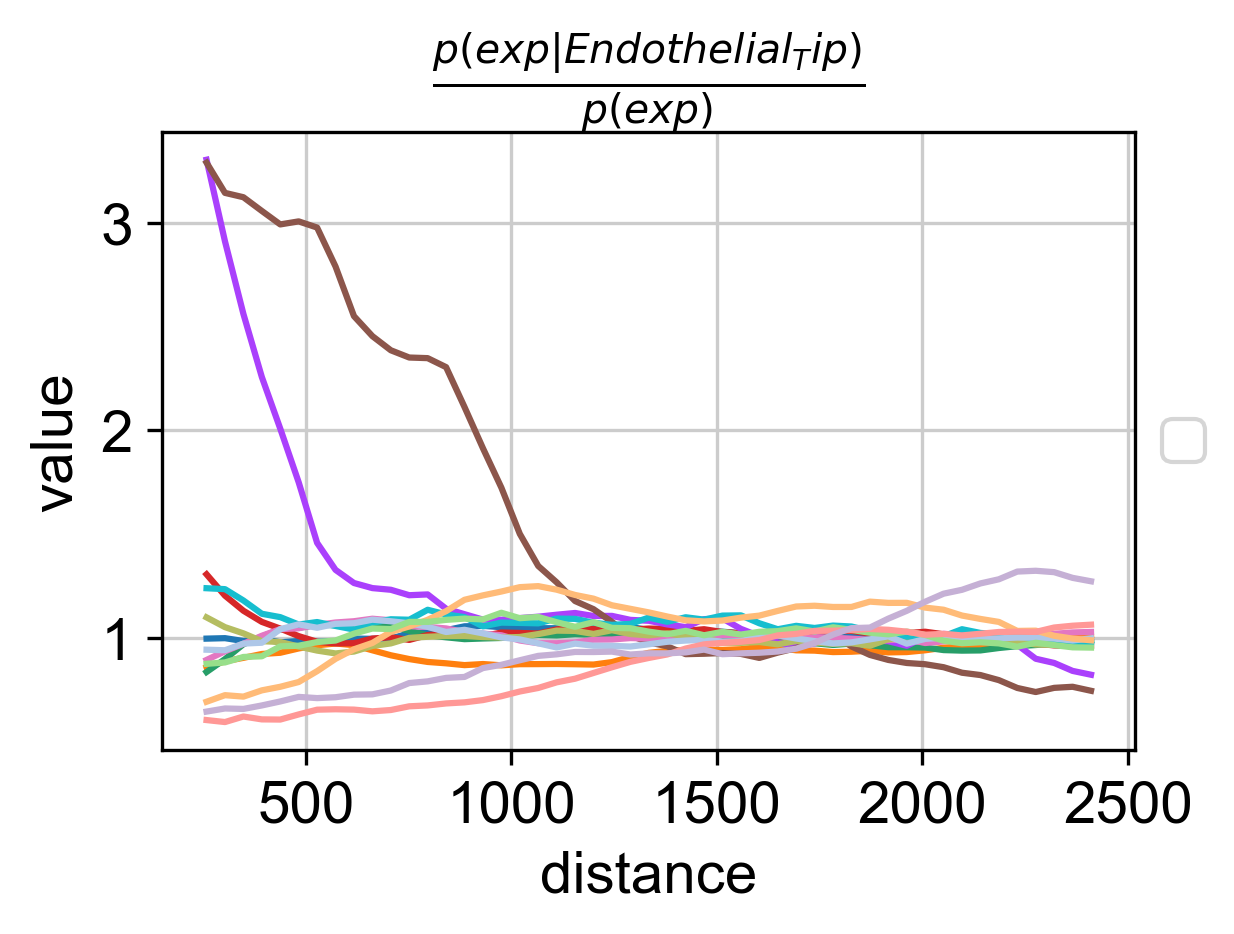

In [44]:
sq.pl.co_occurrence(
    adata,
    cluster_key="cluster",
    clusters="Endothelial_Tip",
    figsize=(4, 3),
    legend=False,
    dpi=300,
    save="co_occurrence_slideseq",
)

In [54]:
sq.gr.spatial_autocorr(adata)

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Calculating moran's statistic for `None` permutations using `1` core(s)
Adding `adata.uns['moranI']`
Finish (0:00:00)


In [55]:
adata.uns["moranI"]

,I,pval_norm,var_norm,pval_norm_fdr_bh
Ttr,0.702647,0.000000,0.000008,0.000000
Plp1,0.527855,0.000000,0.000008,0.000000
Mbp,0.494175,0.000000,0.000008,0.000000
Hpca,0.491435,0.000000,0.000008,0.000000
Enpp2,0.457042,0.000000,0.000008,0.000000
...,...,...,...,...
Rnf217,-0.003832,0.090080,0.000008,0.148831
Irak2,-0.004214,0.070155,0.000008,0.118006
Znrf3,-0.004793,0.046626,0.000008,0.080113
Nol8,-0.005337,0.030757,0.000008,0.054127


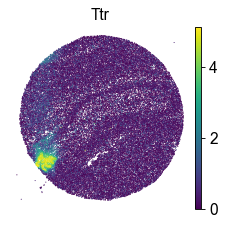

In [60]:
fig, ax = plt.subplots(
    figsize=(5, 3),
)
gene = "Ttr"
sc.pl.spatial(
    adata,
    color=gene,
    spot_size=30,
    frameon=False,
    ax=ax,
    #     show=False,
    save=f"_slideseq_{gene}.png",
)

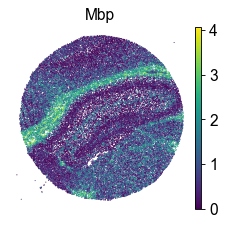

In [67]:
fig, ax = plt.subplots(
    figsize=(5, 3),
)
gene = "Mbp"
sc.pl.spatial(
    adata,
    color=gene,
    spot_size=30,
    frameon=False,
    ax=ax,
    #     show=False,
    save=f"_slideseq_{gene}.png",
)

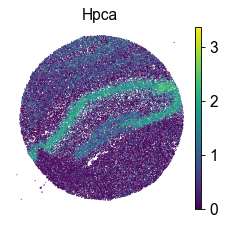

In [68]:
fig, ax = plt.subplots(
    figsize=(5, 3),
)
gene = "Hpca"
sc.pl.spatial(
    adata,
    color=gene,
    spot_size=30,
    frameon=False,
    ax=ax,
    #     show=False,
    save=f"_slideseq_{gene}.png",
)

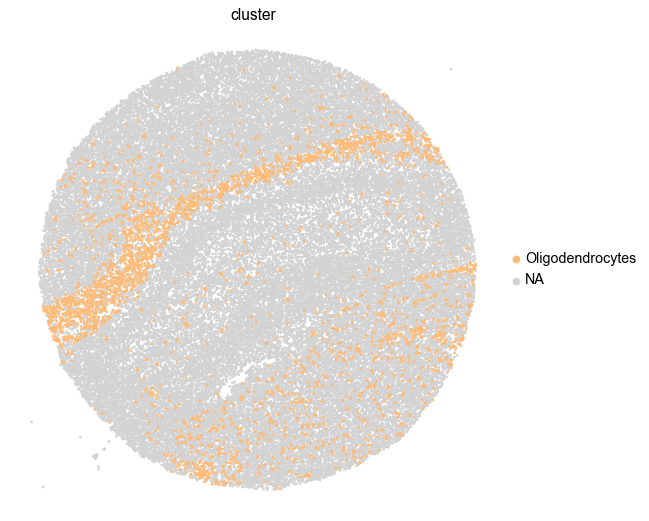

In [63]:
sc.pl.spatial(
    adata,
    color=["cluster"],
    groups="Oligodendrocytes",
    spot_size=30,
    frameon=False,
    #     show=False,
    #     save=f"_slideseq_{gene}.png",
)

In [81]:
sq.gr.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
)

Calculating co-occurrence probabilities
Adding `adata.uns['celltype_mapped_refined_co_occurrence']`
Finish (0:00:43)


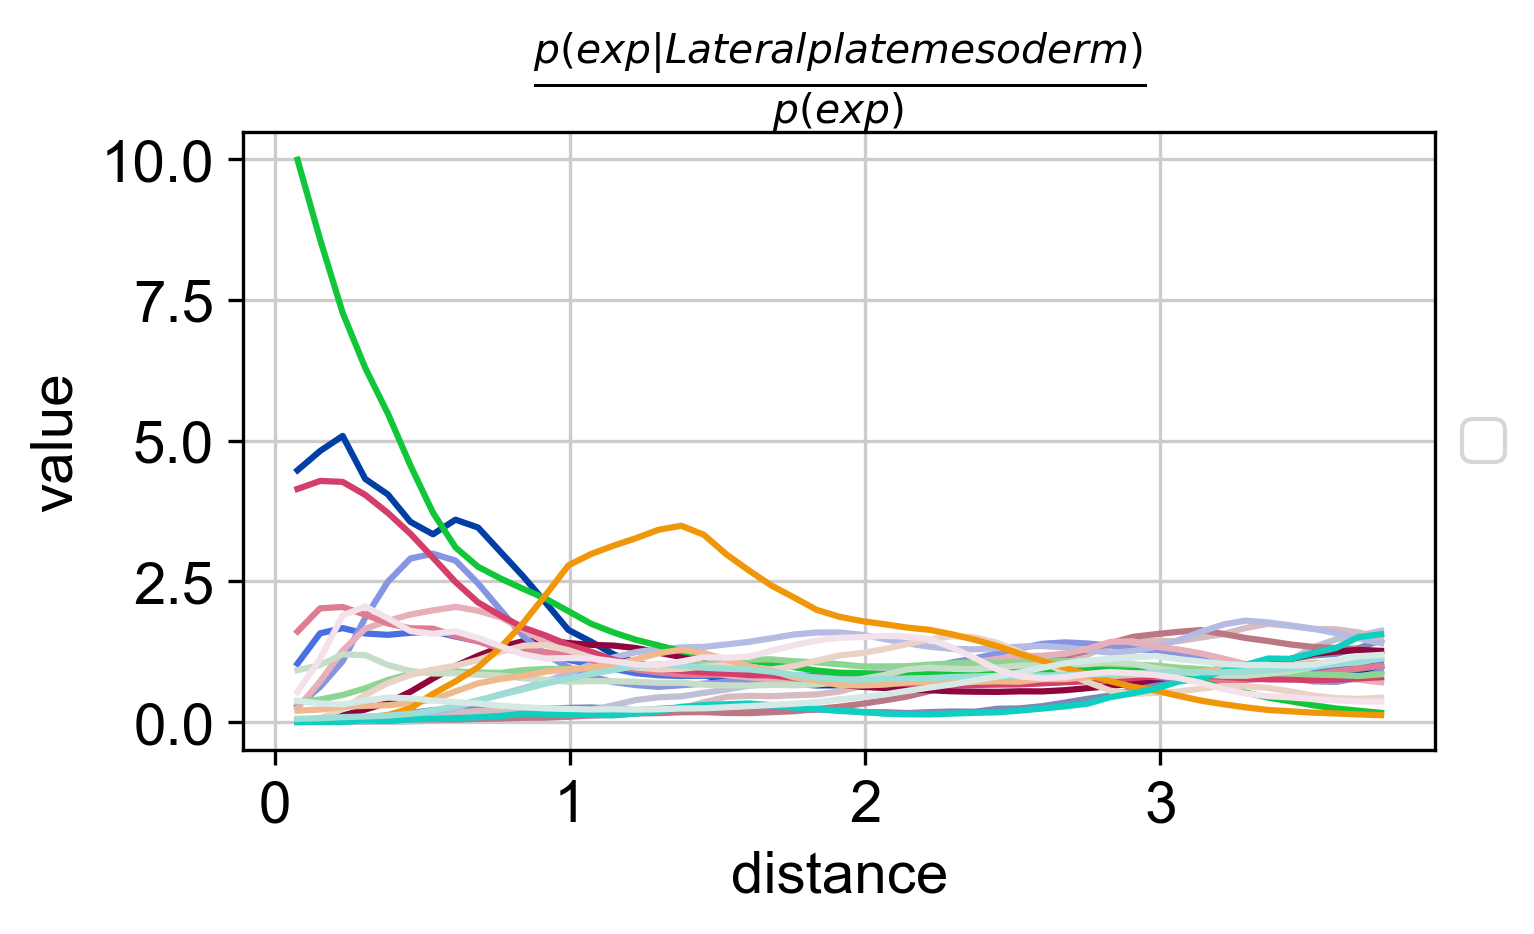

In [103]:
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(5, 3),
    legend=False,
    dpi=300,
    save="co_occurrence_seqfish",
)